In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.plotly as py
import scipy.io#Used to load the OCTAVE *.mat files
import matplotlib.cm as cm#Used to display images in a specific colormap
import scipy.misc#To pick random images to display
from scipy.special import expit#Vectorized sigmoid function
import matplotlib.pyplot as plt
import random

In [2]:
#pd = pd.read_table("data/ex3data1.mat")不行 GG
#mat_contents = sio.loadmat('octave_a.mat')
#type(mat_contents['a'])
datafile = 'data/ex3data1.mat'
mat = scipy.io.loadmat(datafile)
X,y = mat['X'],mat['y']
X = np.insert(X,0,1,axis=1)
#X.shape,X[0].shape
y[0]

array([10], dtype=uint8)

#### Visulize the data

In [3]:
def getpic(row):
    width,height = 20,20
    pic = row[1:].reshape((width,height))
    return pic.T

def displayData(indices_to_display = None):
    width,height = 20,20
    nrows,ncols = 10,10
    if not indices_to_display:
        indices_to_display = random.sample(xrange(X.shape[0]),nrows*ncols)
    big_picture =  np.zeros((height * nrows,width * ncols))
    irow,icol = 0,0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol = 0
        iimg = getpic(X[idx])
        big_picture[irow * height:irow * height + iimg.shape[0],icol*width:icol * width + iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize=(6,6))
    img = scipy.misc.toimage(big_picture)
    plt.imshow(img,cmap=cm.Greys_r)

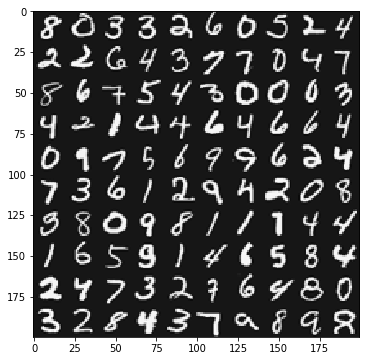

In [40]:
displayData()

In [5]:
def sigfunc(theta,X):
    return expit(np.dot(X,theta))

def costfunc(theta,X,y,mylambda):
    m = X.shape[0]
    t1 = np.log(sigfunc(theta,X)).dot(y.T)
    t2 = np.log(1 - sigfunc(theta,X)).dot(1-y.T)
    left = -(t1 + t2)/m
    right = mylambda * theta.T.dot(theta) * (1. / (2 * m))
    func = left + right
    return func


In [6]:
def gradient(theta,X,y,mylambda):
    #theta = inittheta
    m = X.shape[0]
    #print m
    grad = (1./m) * np.dot(X.T,(sigfunc(theta,X) - y))
    right = mylambda / (1. * m) * theta[1:]
    grad[1:] = grad[1:] + right
    return grad

In [7]:
inittheta = np.zeros((X.shape[1],1))
#print gradient(X,y,inittheta,0.)

In [8]:
from scipy import optimize
def optimizetheta(theta,X,y,mylambda):
    res = optimize.fmin_cg(costfunc,fprime=gradient,x0=theta,args=(X,y,mylambda),maxiter=50,disp=False,full_output=True)
    return res[0],res[1]

In [9]:
def buildtheta():
    inittheta = np.zeros((X.shape[1],1))
    Theta = np.zeros((10,X.shape[1]))
    for i in xrange(10):
        iclass = i if i else 10
        print "Optimizing for handwritten number %d..."%i
        temparr = [1 if x == iclass else 0 for x in y]
        arr = np.array(temparr)
        itheta,imincost = optimizetheta(inittheta,X,arr,0.)
        Theta[i,:] = itheta
    print "Done!"
    return Theta

In [10]:
Theta = buildtheta()

Optimizing for handwritten number 0...
Optimizing for handwritten number 1...
Optimizing for handwritten number 2...
Optimizing for handwritten number 3...
Optimizing for handwritten number 4...
Optimizing for handwritten number 5...
Optimizing for handwritten number 6...
Optimizing for handwritten number 7...
Optimizing for handwritten number 8...
Optimizing for handwritten number 9...
Done!


In [11]:
def predictOnevsall(Theta,row):
    iclass = [10] + range(1,10)
    prop = [0] * 10
    for i in xrange(len(iclass)):
        prop[i] = sigfunc(Theta[i],row)
    return iclass[np.argmax(np.array(prop))]

In [12]:
n_correct,n_total = 0. , 0.
incorrect_indices = []
for i in range(X.shape[0]):
    n_total += 1
    if predictOnevsall(Theta,X[i]) == y[i]:
        n_correct += 1
    else:
        incorrect_indices.append(i)
print "Training set accuracy: %0.1f%%"%(100*(n_correct/n_total))

Training set accuracy: 89.3%


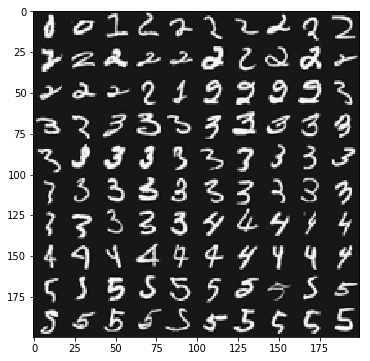

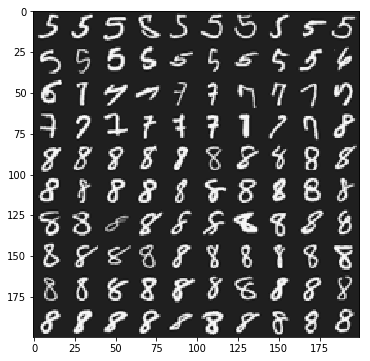

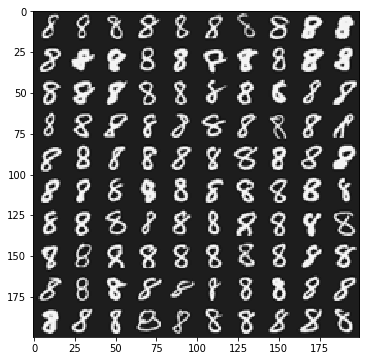

In [13]:
displayData(incorrect_indices[:100])
displayData(incorrect_indices[100:200])
displayData(incorrect_indices[200:300])

### neural network

In [15]:
datafile = 'data/ex3weights.mat'
mat = scipy.io.loadmat(datafile)
#print mat['Theta1'],mat['Theta2']
theta1 = mat['Theta1']
theta2 = mat['Theta2']
# 单隐藏层神经网络
#每一行是上一层神经元对下一层神经元的权值分布
print theta1.shape
print theta2.shape

(25, 401)
(10, 26)


In [42]:
def forwardprogation(Thetas,row):
    #hid = costfunc(theta,row)
    weightlayer = len(Thetas)
    layer = row
    for i in xrange(weightlayer):
        layer = sigfunc(layer,Thetas[i])
        #print layer.shape
        #p.insert(layer,0,1)
        if i != weightlayer - 1:
            layer = np.insert(layer,0,1)
        #print layer.shape
    return layer
        
        

In [43]:
Thetas = [theta1,theta2]
#print len(Thetas)
print forwardprogation(Thetas,X[0])

[  1.12661530e-04   1.74127856e-03   2.52696959e-03   1.84032321e-05
   9.36263860e-03   3.99270267e-03   5.51517524e-03   4.01468105e-04
   6.48072305e-03   9.95734012e-01]


In [46]:
def get_predict(X,Thetas):
    X_len = X.shape[0]
    predict = np.zeros((X_len,1))
    for i in xrange(X_len):
        predict[i] = forwardprogation(Thetas,X[i]).argmax() + 1
    return predict
    

In [48]:
y_predict = get_predict(X,Thetas)
y_len = len(y)
n_total,n_correct = 0,0
in_correct_list = []
for i in xrange(y_len):
    n_total += 1
    if y[i] == y_predict[i]:
        n_correct += 1
    else:
        in_correct_list.append(i)
corr = float(n_correct)/n_total
print "the accuracy with neuron network is %0.1f%%" % (corr * 100)

the accuracy with neuron network is 97.5%


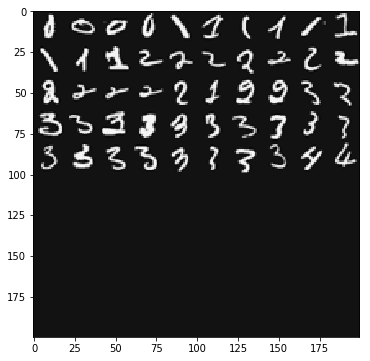

In [53]:
displayData(in_correct_list[:50])